<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function Momentum: $r(s_{t-252}, s_{t-1}, a, s_t)$ is the incentive mechanism for an agent to learn a better momentum strategy. The change of the portfolio value when action a is taken at state $s_{t-1}$ and arriving at new state $s_t$,  i.e., $r(s_{t-252}, s_{t-1}, a, s_t) = v_t − v_{t-1} + v_t - v_{t-252}$, where $v_t$, $v_{t-1}$ and $v_{t-252}$ represent the portfolio
values at state $s_t$, $s_{t-1}$ and $s_{t-252}$ respectively. In this way, we take into account the momentum of the market instead of focusing on the immediate change in portfolio values.

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime
from stockstats import StockDataFrame

%matplotlib inline
from finrl.apps import config
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools
import math

/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


<a id='1.4'></a>
## 2.4. Create Folders

In [2]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Stock Data from Yahoo Finance
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [3]:
df = YahooDownloader(start_date = '2016-01-01',
                     end_date = '2020-01-01',
                     ticker_list = ['601899.SS', '601919.SS', '600030.SS', '601066.SS', '601888.SS', '601601.SS', '601857.SS', '600028.SS', '601088.SS', '601628.SS', '601318.SS', '600050.SS', '601668.SS', '603986.SS', '600036.SS', '600588.SS', '600887.SS', '603259.SS', '601336.SS', '601166.SS', '600745.SS', '603501.SS', '600309.SS', '600438.SS', '600809.SS', '600104.SS', '600547.SS', '600031.SS', '600000.SS', '600436.SS', '601288.SS', '601012.SS', '601688.SS', '600570.SS', '600276.SS', '600893.SS', '600837.SS', '603288.SS', '600585.SS', '600690.SS', '601211.SS', '600519.SS', '601138.SS', '601398.SS', '600196.SS', '600900.SS', '601633.SS', '600048.SS']).fetch_data()

[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Shape of DataFrame:  (44459, 8)


In [ ]:
df.shape

In [ ]:
df.head()

In [3]:
#Read local data from here
df = pd.read_csv('Stock_Trade_Data.csv')

In [4]:
#Change the format of date
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [5]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2016-01-04,12.783216,12.783216,12.272727,10.339080,60404072,600000.SS,0
1,2016-01-04,4.970000,5.000000,4.750000,3.358103,147078224,600028.SS,0
2,2016-01-04,19.290001,19.290001,17.420000,15.554594,196058373,600030.SS,0
3,2016-01-04,6.450000,6.490000,5.980000,5.521706,61713491,600031.SS,0
4,2016-01-04,17.910000,17.950001,17.160000,14.325298,37340569,600036.SS,0


# Part 4: Preprocess fundamental data
- Import finanical data downloaded from Compustat via WRDS(Wharton Research Data Service)
- Preprocess the dataset and calculate financial ratios
- Add those ratios to the price data preprocessed in Part 3
- Calculate price-related ratios such as P/E and P/B

## 4-1 Import the financial data

In [6]:
fund = pd.read_csv("Fundamental_Data.csv")

In [7]:
# Check the imported dataset
fund.head()

,tic,date,rev_q,cogs_q,op_inc_q,net_inc_q,sh_outstanding,eps_incl_ex,div_per_sh,cash_eq,...,inventories,cur_assets,tot_assets,payables,short_debt,cur_liabilities,long_debt,tot_liabilities,com_eq,sh_equity
0,600000.SS,20160331,6490.92,NaN,2835.85,2159.23,29352.17,0.70,NaN,0.0,...,0.0,0.0,804304.62,0.0,0.0,0.0,0.0,750712.31,19653.0,53592.31
1,600000.SS,20160630,6150.92,NaN,2585.54,2000.77,29352.17,1.23,NaN,0.0,...,0.0,0.0,826352.77,0.0,0.0,0.0,0.0,772464.31,21618.0,53888.46
2,600000.SS,20160930,5962.46,NaN,2811.23,2168.92,29352.17,1.87,NaN,0.0,...,0.0,0.0,856043.38,0.0,0.0,0.0,0.0,799950.15,21618.0,56093.23
3,600000.SS,20161231,6132.92,NaN,2484.31,1929.23,29352.17,2.40,0.2,0.0,...,0.0,0.0,901117.38,0.0,0.0,0.0,0.0,843742.92,21618.0,57374.46
4,600000.SS,20170331,6516.92,NaN,2830.31,2253.38,29352.17,0.63,NaN,0.0,...,0.0,0.0,906102.00,0.0,0.0,0.0,0.0,846829.54,21618.0,59272.46


## 4-2 Specify items needed to calculate financial ratios
- To know more about the data description of the dataset, please check WRDS's website(https://wrds-www.wharton.upenn.edu/). Login will be required.

'date' # Date
'op_inc_q' # Quarterly operating income
'rev_q' # Quartely revenue
'net_inc_q' # Quartely net income
'tot_assets' # Assets
'sh_equity' # Shareholder's equity
'eps_incl_ex' # EPS(Basic) incl. Extraordinary items
'com_eq' # Common Equity
'sh_outstanding' # Common Shares Outstanding
'div_per_sh' # Dividends per share
'cur_assets' # Current assets
'cur_liabilities' # Current liabilities
'cash_eq' # Cash & Equivalent
'receivables' # Receivalbles
'cogs_q' # Cost of  Goods Sold
'inventories' # Inventories
'payables' # Account payable
'long_debt' # Long term debt
'short_debt' # Debt in current liabilites
'tot_liabilities' # Liabilities   

In [8]:
fund_data = fund
fund_data.head()

,tic,date,rev_q,cogs_q,op_inc_q,net_inc_q,sh_outstanding,eps_incl_ex,div_per_sh,cash_eq,...,inventories,cur_assets,tot_assets,payables,short_debt,cur_liabilities,long_debt,tot_liabilities,com_eq,sh_equity
0,600000.SS,20160331,6490.92,NaN,2835.85,2159.23,29352.17,0.70,NaN,0.0,...,0.0,0.0,804304.62,0.0,0.0,0.0,0.0,750712.31,19653.0,53592.31
1,600000.SS,20160630,6150.92,NaN,2585.54,2000.77,29352.17,1.23,NaN,0.0,...,0.0,0.0,826352.77,0.0,0.0,0.0,0.0,772464.31,21618.0,53888.46
2,600000.SS,20160930,5962.46,NaN,2811.23,2168.92,29352.17,1.87,NaN,0.0,...,0.0,0.0,856043.38,0.0,0.0,0.0,0.0,799950.15,21618.0,56093.23
3,600000.SS,20161231,6132.92,NaN,2484.31,1929.23,29352.17,2.40,0.2,0.0,...,0.0,0.0,901117.38,0.0,0.0,0.0,0.0,843742.92,21618.0,57374.46
4,600000.SS,20170331,6516.92,NaN,2830.31,2253.38,29352.17,0.63,NaN,0.0,...,0.0,0.0,906102.00,0.0,0.0,0.0,0.0,846829.54,21618.0,59272.46


## 4-3 Calculate financial ratios
- For items from Profit/Loss statements, we calculate LTM (Last Twelve Months) and use them to derive profitability related ratios such as Operating Maring and ROE. For items from balance sheets, we use the numbers on the day.
- To check the definitions of the financial ratios calculated here, please refer to CFI's website: https://corporatefinanceinstitute.com/resources/knowledge/finance/financial-ratios/

In [9]:
# Calculate financial ratios
date = pd.to_datetime(fund_data['date'],format='%Y%m%d')

tic = fund_data['tic'].to_frame('tic')

# Profitability ratios
# Operating Margin
OPM = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='OPM')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        OPM[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        OPM.iloc[i] = np.nan
    else:
        OPM.iloc[i] = np.sum(fund_data['op_inc_q'].iloc[i-3:i])/np.sum(fund_data['rev_q'].iloc[i-3:i])

# Net Profit Margin        
NPM = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='NPM')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        NPM[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        NPM.iloc[i] = np.nan
    else:
        NPM.iloc[i] = np.sum(fund_data['net_inc_q'].iloc[i-3:i])/np.sum(fund_data['rev_q'].iloc[i-3:i])

# Return On Assets
ROA = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='ROA')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        ROA[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        ROA.iloc[i] = np.nan
    else:
        ROA.iloc[i] = np.sum(fund_data['net_inc_q'].iloc[i-3:i])/fund_data['tot_assets'].iloc[i]

# Return on Equity
ROE = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='ROE')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        ROE[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        ROE.iloc[i] = np.nan
    else:
        ROE.iloc[i] = np.sum(fund_data['net_inc_q'].iloc[i-3:i])/fund_data['sh_equity'].iloc[i]        

# For calculating valuation ratios in the next subpart, calculate per share items in advance
# Earnings Per Share       
EPS = fund_data['eps_incl_ex'].to_frame('EPS')

# Book Per Share
BPS = (fund_data['com_eq']/fund_data['sh_outstanding']).to_frame('BPS') # Need to check units

#Dividend Per Share
DPS = fund_data['div_per_sh'].to_frame('DPS')

# Liquidity ratios
# Current ratio
cur_ratio = (fund_data['cur_assets']/fund_data['cur_liabilities']).to_frame('cur_ratio')

# Quick ratio
quick_ratio = ((fund_data['cash_eq'] + fund_data['receivables'] )/fund_data['cur_liabilities']).to_frame('quick_ratio')

# Cash ratio
cash_ratio = (fund_data['cash_eq']/fund_data['cur_liabilities']).to_frame('cash_ratio')


# Efficiency ratios
# Inventory turnover ratio
inv_turnover = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='inv_turnover')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        inv_turnover[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        inv_turnover.iloc[i] = np.nan
    else:
        inv_turnover.iloc[i] = np.sum(fund_data['cogs_q'].iloc[i-3:i])/fund_data['inventories'].iloc[i]

# Receivables turnover ratio       
acc_rec_turnover = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='acc_rec_turnover')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        acc_rec_turnover[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        acc_rec_turnover.iloc[i] = np.nan
    else:
        acc_rec_turnover.iloc[i] = np.sum(fund_data['rev_q'].iloc[i-3:i])/fund_data['receivables'].iloc[i]

# Payable turnover ratio
acc_pay_turnover = pd.Series(np.empty(fund_data.shape[0],dtype=object),name='acc_pay_turnover')
for i in range(0, fund_data.shape[0]):
    if i-3 < 0:
        acc_pay_turnover[i] = np.nan
    elif fund_data.iloc[i,1] != fund_data.iloc[i-3,1]:
        acc_pay_turnover.iloc[i] = np.nan
    else:
        acc_pay_turnover.iloc[i] = np.sum(fund_data['cogs_q'].iloc[i-3:i])/fund_data['payables'].iloc[i]
        
## Leverage financial ratios
# Debt ratio
debt_ratio = (fund_data['tot_liabilities']/fund_data['tot_assets']).to_frame('debt_ratio')

# Debt to Equity ratio
debt_to_equity = (fund_data['tot_liabilities']/fund_data['sh_equity']).to_frame('debt_to_equity')

In [10]:
# Create a dataframe that merges all the ratios
ratios = pd.concat([date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,
                    cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,
                   debt_ratio,debt_to_equity], axis=1)

In [11]:
# Check the ratio data
ratios.head()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
0,2016-03-31,600000.SS,NaN,NaN,NaN,NaN,0.70,0.669559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.933368,14.007836
1,2016-06-30,600000.SS,NaN,NaN,NaN,NaN,1.23,0.736504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934788,14.334503
2,2016-09-30,600000.SS,NaN,NaN,NaN,NaN,1.87,0.736504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934474,14.261082
3,2016-12-31,600000.SS,NaN,NaN,NaN,NaN,2.40,0.736504,0.2,NaN,NaN,NaN,NaN,NaN,NaN,0.936330,14.705897
4,2017-03-31,600000.SS,NaN,NaN,NaN,NaN,0.63,0.736504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934585,14.287066


In [12]:
ratios.tail()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
760,2018-12-31,603986.SS,NaN,NaN,NaN,NaN,1.44,0.427561,0.29,2.820329,0.164646,0.0,NaN,NaN,NaN,0.336832,0.507932
761,2019-03-31,603986.SS,NaN,NaN,NaN,NaN,0.14,0.427936,NaN,3.736328,0.236478,0.0,NaN,NaN,NaN,0.276640,0.382437
762,2019-06-30,603986.SS,NaN,NaN,NaN,NaN,0.66,0.462019,NaN,2.106813,0.183397,0.0,NaN,NaN,NaN,0.230479,0.299510
763,2019-09-30,603986.SS,NaN,NaN,NaN,NaN,1.53,0.482298,NaN,4.537867,0.330433,0.0,NaN,NaN,NaN,0.145209,0.169877
764,2019-12-31,603986.SS,NaN,NaN,NaN,NaN,2.02,0.482298,0.38,4.231403,0.275403,0.0,NaN,NaN,NaN,0.153479,0.181304


## 4-4 Deal with NAs and infinite values
- We replace N/A and infinite values with zero so that they can be recognized as a state

In [13]:
# Replace NAs infinite values with zero
final_ratios = ratios.copy()
final_ratios = final_ratios.fillna(0)
final_ratios = final_ratios.replace(np.inf,0)

In [14]:
final_ratios.head()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
0,2016-03-31,600000.SS,0,0,0,0,0.70,0.669559,0.0,0.0,0.0,0.0,0,0,0,0.933368,14.007836
1,2016-06-30,600000.SS,0,0,0,0,1.23,0.736504,0.0,0.0,0.0,0.0,0,0,0,0.934788,14.334503
2,2016-09-30,600000.SS,0,0,0,0,1.87,0.736504,0.0,0.0,0.0,0.0,0,0,0,0.934474,14.261082
3,2016-12-31,600000.SS,0,0,0,0,2.40,0.736504,0.2,0.0,0.0,0.0,0,0,0,0.936330,14.705897
4,2017-03-31,600000.SS,0,0,0,0,0.63,0.736504,0.0,0.0,0.0,0.0,0,0,0,0.934585,14.287066


In [15]:
final_ratios.tail()

,date,tic,OPM,NPM,ROA,ROE,EPS,BPS,DPS,cur_ratio,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity
760,2018-12-31,603986.SS,0,0,0,0,1.44,0.427561,0.29,2.820329,0.164646,0.0,0,0,0,0.336832,0.507932
761,2019-03-31,603986.SS,0,0,0,0,0.14,0.427936,0.00,3.736328,0.236478,0.0,0,0,0,0.276640,0.382437
762,2019-06-30,603986.SS,0,0,0,0,0.66,0.462019,0.00,2.106813,0.183397,0.0,0,0,0,0.230479,0.299510
763,2019-09-30,603986.SS,0,0,0,0,1.53,0.482298,0.00,4.537867,0.330433,0.0,0,0,0,0.145209,0.169877
764,2019-12-31,603986.SS,0,0,0,0,2.02,0.482298,0.38,4.231403,0.275403,0.0,0,0,0,0.153479,0.181304


## 4-5 Merge stock price data and ratios into one dataframe
- Merge the price dataframe preprocessed in Part 3 and the ratio dataframe created in this part
- Since the prices are daily and ratios are quartely, we have NAs in the ratio columns after merging the two dataframes. We deal with this by backfilling the ratios.

In [16]:
list_ticker = df["tic"].unique().tolist()
list_date = list(pd.date_range(df['date'].min(),df['date'].max()))
combination = list(itertools.product(list_date,list_ticker))

# Merge stock price data and ratios into one dataframe
processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(df,on=["date","tic"],how="left")
processed_full = processed_full.merge(final_ratios,how='left',on=['date','tic'])
processed_full = processed_full.sort_values(['tic','date'])

# Backfill the ratio data to make them daily
processed_full = processed_full.bfill(axis='rows')


## 4-6 Calculate market valuation ratios using daily stock price data 

In [17]:
# Calculate P/E, P/B and dividend yield using daily closing price
processed_full['PE'] = processed_full['close']/processed_full['EPS']
processed_full['PB'] = processed_full['close']/processed_full['BPS']
processed_full['Div_yield'] = processed_full['DPS']/processed_full['close']

# Drop per share items used for the above calculation
processed_full = processed_full.drop(columns=['day','EPS','BPS','DPS'])
# Replace NAs infinite values with zero
processed_full = processed_full.copy()
processed_full = processed_full.fillna(0)
processed_full = processed_full.replace(np.inf,0)

In [18]:
# Check the final data
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,OPM,NPM,ROA,...,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity,PE,PB,Div_yield
0,2016-01-04,600000.SS,12.783216,12.783216,12.272727,10.339080,60404072.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.933368,14.007836,14.770114,15.441634,0.0
1,2016-01-04,600028.SS,4.970000,5.000000,4.750000,3.358103,147078224.0,0.0,0.0,0.0,...,0.097785,0.0,0.0,0.0,0.0,0.430127,0.754776,67.162061,3.358109,0.0
2,2016-01-04,600030.SS,19.290001,19.290001,17.420000,15.554594,196058373.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.757398,3.121975,111.104243,16.594232,0.0
3,2016-01-04,600031.SS,6.450000,6.490000,5.980000,5.521706,61713491.0,0.0,0.0,0.0,...,0.813314,0.0,0.0,0.0,0.0,0.608050,1.551346,552.170610,6.156581,0.0
4,2016-01-04,600036.SS,17.910000,17.950001,17.160000,14.325298,37340569.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.930035,13.292930,19.623696,14.325213,0.0
5,2016-01-04,600048.SS,10.630000,10.650000,9.580000,7.441584,99735936.0,0.0,0.0,0.0,...,0.011784,0.0,0.0,0.0,0.0,0.764026,3.237759,57.242955,8.281017,0.0
6,2016-01-04,600050.SS,6.180000,6.200000,5.760000,5.421938,93856954.0,0.0,0.0,0.0,...,0.066997,0.0,0.0,0.0,0.0,0.610193,1.565375,542.193842,7.927376,0.0
7,2016-01-04,600104.SS,21.100000,21.200001,19.670000,14.515098,12792460.0,0.0,0.0,0.0,...,0.145252,0.0,0.0,0.0,0.0,0.571480,1.333615,20.159858,15.381206,0.0
8,2016-01-04,600196.SS,23.490000,23.500000,21.830000,20.519548,15260725.0,0.0,0.0,0.0,...,0.199727,0.0,0.0,0.0,0.0,0.461874,0.858299,75.998327,22.725900,0.0
9,2016-01-04,600276.SS,15.178606,15.178606,14.554150,14.370110,28060333.0,0.0,0.0,0.0,...,1.990763,0.0,0.0,0.0,0.0,0.094406,0.104247,41.057456,46.988959,0.0


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

## 5-1 Split data into training and trade dataset
- Training data split: 2009-01-01 to 2018-12-31
- Trade data split: 2019-01-01 to 2020-09-30

In [19]:
train = data_split(processed_full, '2016-01-04','2019-01-04')
trade = data_split(processed_full, '2019-01-04','2019-12-31')
# Check the length of the two datasets
print(len(train))
print(len(trade))

52608
17328


In [20]:
train.head()

,date,tic,open,high,low,close,volume,OPM,NPM,ROA,...,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity,PE,PB,Div_yield
0,2016-01-04,600000.SS,12.783216,12.783216,12.272727,10.339080,60404072.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.933368,14.007836,14.770114,15.441634,0.0
0,2016-01-04,600028.SS,4.970000,5.000000,4.750000,3.358103,147078224.0,0.0,0.0,0.0,...,0.097785,0.0,0.0,0.0,0.0,0.430127,0.754776,67.162061,3.358109,0.0
0,2016-01-04,600030.SS,19.290001,19.290001,17.420000,15.554594,196058373.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.757398,3.121975,111.104243,16.594232,0.0
0,2016-01-04,600031.SS,6.450000,6.490000,5.980000,5.521706,61713491.0,0.0,0.0,0.0,...,0.813314,0.0,0.0,0.0,0.0,0.608050,1.551346,552.170610,6.156581,0.0
0,2016-01-04,600036.SS,17.910000,17.950001,17.160000,14.325298,37340569.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.930035,13.292930,19.623696,14.325213,0.0


In [21]:
trade.head()

,date,tic,open,high,low,close,volume,OPM,NPM,ROA,...,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity,PE,PB,Div_yield
0,2019-01-04,600000.SS,9.73,10.00,9.73,8.720795,27172844.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.924334,12.215981,16.454330,8.720845,0.0
0,2019-01-04,600028.SS,5.01,5.12,5.00,4.187504,161669605.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.513581,1.055841,34.895865,4.187511,0.0
0,2019-01-04,600030.SS,16.01,16.01,16.01,15.308958,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.759871,3.164432,43.739880,16.332178,0.0
0,2019-01-04,600031.SS,7.87,8.07,7.77,7.602386,38129559.0,0.0,0.0,0.0,...,0.617437,0.0,0.0,0.0,0.0,0.525491,1.107440,18.542404,7.708276,0.0
0,2019-01-04,600036.SS,24.76,25.65,24.65,23.496077,66853140.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.915660,10.856755,23.496077,23.495937,0.0


## 5-2 Set up the training environment

In [62]:
import gym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from gym import spaces
from gym.utils import seeding
from stable_baselines3.common.vec_env import DummyVecEnv

matplotlib.use("Agg")

# from stable_baselines3.common import logger


class StockTradingEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""

    metadata = {"render.modes": ["human"]}

    def __init__(
        self,
        df,
        stock_dim,
        hmax,
        initial_amount,
        buy_cost_pct,
        sell_cost_pct,
        reward_scaling,
        state_space,
        action_space,
        tech_indicator_list,
        turbulence_threshold=None,
        risk_indicator_col="turbulence",
        make_plots=False,
        print_verbosity=10,
        day=0,
        initial=True,
        previous_state=[],
        model_name="",
        mode="",
        iteration="",
    ):
        self.day = day
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.buy_cost_pct = buy_cost_pct
        self.sell_cost_pct = sell_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.action_space = spaces.Box(low=-1, high=1, shape=(self.action_space,))
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.state_space,)
        )
        self.data = self.df.loc[self.day, :]
        self.terminal = False
        self.make_plots = make_plots
        self.print_verbosity = print_verbosity
        self.turbulence_threshold = turbulence_threshold
        self.risk_indicator_col = risk_indicator_col
        self.initial = initial
        self.previous_state = previous_state
        self.model_name = model_name
        self.mode = mode
        self.iteration = iteration
        # initalize state
        self.state = self._initiate_state()

        # initialize reward
        self.reward = 0
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.episode = 0
        # memorize all the total balance change
        self.asset_memory = [self.initial_amount]
        self.rewards_memory = []
        self.actions_memory = []
        self.date_memory = [self._get_date()]
        # self.reset()
        self._seed()

    def _sell_stock(self, index, action):
        def _do_sell_normal():
            if self.state[index + 1] > 0:
                # Sell only if the price is > 0 (no missing data in this particular date)
                # perform sell action based on the sign of the action
                if self.state[index + self.stock_dim + 1] > 0:
                    # Sell only if current asset is > 0
                    sell_num_shares = min(
                        abs(action), self.state[index + self.stock_dim + 1]
                    )
                    sell_amount = (
                        self.state[index + 1]
                        * sell_num_shares
                        * (1 - self.sell_cost_pct)
                    )
                    # update balance
                    self.state[0] += sell_amount

                    self.state[index + self.stock_dim + 1] -= sell_num_shares
                    self.cost += (
                        self.state[index + 1] * sell_num_shares * self.sell_cost_pct
                    )
                    self.trades += 1
                else:
                    sell_num_shares = 0
            else:
                sell_num_shares = 0

            return sell_num_shares

        # perform sell action based on the sign of the action
        if self.turbulence_threshold is not None:
            if self.turbulence >= self.turbulence_threshold:
                if self.state[index + 1] > 0:
                    # Sell only if the price is > 0 (no missing data in this particular date)
                    # if turbulence goes over threshold, just clear out all positions
                    if self.state[index + self.stock_dim + 1] > 0:
                        # Sell only if current asset is > 0
                        sell_num_shares = self.state[index + self.stock_dim + 1]
                        sell_amount = (
                            self.state[index + 1]
                            * sell_num_shares
                            * (1 - self.sell_cost_pct)
                        )
                        # update balance
                        self.state[0] += sell_amount
                        self.state[index + self.stock_dim + 1] = 0
                        self.cost += (
                            self.state[index + 1] * sell_num_shares * self.sell_cost_pct
                        )
                        self.trades += 1
                    else:
                        sell_num_shares = 0
                else:
                    sell_num_shares = 0
            else:
                sell_num_shares = _do_sell_normal()
        else:
            sell_num_shares = _do_sell_normal()

        return sell_num_shares

    def _buy_stock(self, index, action):
        def _do_buy():
            if self.state[index + 1] > 0:
                # Buy only if the price is > 0 (no missing data in this particular date)
                available_amount = self.state[0] // self.state[index + 1]
                # print('available_amount:{}'.format(available_amount))

                # update balance
                buy_num_shares = min(available_amount, action)
                buy_amount = (
                    self.state[index + 1] * buy_num_shares * (1 + self.buy_cost_pct)
                )
                self.state[0] -= buy_amount

                self.state[index + self.stock_dim + 1] += buy_num_shares

                self.cost += self.state[index + 1] * buy_num_shares * self.buy_cost_pct
                self.trades += 1
            else:
                buy_num_shares = 0

            return buy_num_shares

        # perform buy action based on the sign of the action
        if self.turbulence_threshold is None:
            buy_num_shares = _do_buy()
        else:
            if self.turbulence < self.turbulence_threshold:
                buy_num_shares = _do_buy()
            else:
                buy_num_shares = 0
                pass

        return buy_num_shares

    def _make_plot(self):
        plt.plot(self.asset_memory, "r")
        plt.savefig("results/account_value_trade_{}.png".format(self.episode))
        plt.close()

    def step(self, actions):
        R_f = 0.1 # risk_free rate
        self.terminal = self.day >= len(self.df.index.unique()) - 1
        if self.terminal:
            # print(f"Episode: {self.episode}")
            if self.make_plots:
                self._make_plot()
            end_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            df_total_value = pd.DataFrame(self.asset_memory)
            tot_reward = (
                self.state[0]
                + sum(
                    np.array(self.state[1 : (self.stock_dim + 1)])
                    * np.array(
                        self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)]
                    )
                )
                - self.initial_amount
            )
            df_total_value.columns = ["account_value"]
            df_total_value["date"] = self.date_memory
            df_total_value["daily_return"] = df_total_value["account_value"].pct_change(
                1
            )
            if df_total_value["daily_return"].std() != 0:
                sharpe = (
                    (252 ** 0.5)
                    * df_total_value["daily_return"].mean()
                    / df_total_value["daily_return"].std()
                )
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.columns = ["account_rewards"]
            df_rewards["date"] = self.date_memory[:-1]
            if self.episode % self.print_verbosity == 0:
                print(f"day: {self.day}, episode: {self.episode}")
                print(f"begin_total_asset: {self.asset_memory[0]:0.2f}")
                print(f"end_total_asset: {end_total_asset:0.2f}")
                print(f"total_reward: {tot_reward:0.2f}")
                print(f"total_cost: {self.cost:0.2f}")
                print(f"total_trades: {self.trades}")
                if df_total_value["daily_return"].std() != 0:
                    print(f"Sharpe: {sharpe:0.3f}")
                print("=================================")

            if (self.model_name != "") and (self.mode != ""):
                df_actions = self.save_action_memory()
                df_actions.to_csv(
                    "results/actions_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    )
                )
                df_total_value.to_csv(
                    "results/account_value_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                df_rewards.to_csv(
                    "results/account_rewards_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                plt.plot(self.asset_memory, "r")
                plt.savefig(
                    "results/account_value_{}_{}_{}.png".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                plt.close()

            # Add outputs to logger interface
            # logger.record("environment/portfolio_value", end_total_asset)
            # logger.record("environment/total_reward", tot_reward)
            # logger.record("environment/total_reward_pct", (tot_reward / (end_total_asset - tot_reward)) * 100)
            # logger.record("environment/total_cost", self.cost)
            # logger.record("environment/total_trades", self.trades)

            return self.state, self.reward, self.terminal, {}

        else:

            actions = actions * self.hmax  # actions initially is scaled between 0 to 1
            actions = actions.astype(
                int
            )  # convert into integer because we can't by fraction of shares
            if self.turbulence_threshold is not None:
                if self.turbulence >= self.turbulence_threshold:
                    actions = np.array([-self.hmax] * self.stock_dim)
            begin_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            # print("begin_total_asset:{}".format(begin_total_asset))

            argsort_actions = np.argsort(actions)

            sell_index = argsort_actions[: np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][: np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print(f"Num shares before: {self.state[index+self.stock_dim+1]}")
                # print(f'take sell action before : {actions[index]}')
                actions[index] = self._sell_stock(index, actions[index]) * (-1)
                # print(f'take sell action after : {actions[index]}')
                # print(f"Num shares after: {self.state[index+self.stock_dim+1]}")

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                actions[index] = self._buy_stock(index, actions[index])

            self.actions_memory.append(actions)

            # state: s -> s+1
            self.day += 1
            self.data = self.df.loc[self.day, :]
            if self.turbulence_threshold is not None:
                if len(self.df.tic.unique()) == 1:
                    self.turbulence = self.data[self.risk_indicator_col]
                elif len(self.df.tic.unique()) > 1:
                    self.turbulence = self.data[self.risk_indicator_col].values[0]
            self.state = self._update_state()

            end_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            self.asset_memory.append(end_total_asset)
            self.date_memory.append(self._get_date())
            if len(self.asset_memory) > 21:
                if len(self.asset_memory) > 63:
                    if len(self.asset_memory) > 252:
                        #self.reward = 0.5*math.log(end_total_asset/self.asset_memory[-64]) + 0.5*math.log(end_total_asset/self.asset_memory[-253])
                        #self.reward = 0.25*(end_total_asset - begin_total_asset) + 0.25*(end_total_asset - self.asset_memory[-22]) + 0.25*(end_total_asset - self.asset_memory[-64]) + 0.25*(end_total_asset - self.asset_memory[-253])
                        #self.reward = 0.5*(end_total_asset - begin_total_asset) + 0.5*(end_total_asset - self.asset_memory[-253])
                        #self.reward = end_total_asset - self.asset_memory[-253]
                        #self.reward = end_total_asset - begin_total_asset
                        #self.reward = 0.33*(end_total_asset - begin_total_asset) + 0.33*(end_total_asset - self.asset_memory[-64]) + 0.33*(end_total_asset - self.asset_memory[-253])
                        #self.reward = 0.5*(end_total_asset - self.asset_memory[-64]) + 0.5*(end_total_asset - self.asset_memory[-253])
                        
                        R = (end_total_asset - self.asset_memory[-253]) / self.asset_memory[-253]
                        R_list = (np.array(self.asset_memory) - self.asset_memory[-253]) / self.asset_memory[-253]
                        STD = np.std(R_list - R_f)
                        self.reward = (R - R_f) / STD
                    
                    else:
                        #self.reward = math.log(end_total_asset/self.asset_memory[-64])
                        #self.reward = math.log(end_total_asset/begin_total_asset)
                        #self.reward = 0.33*(end_total_asset - begin_total_asset) + 0.33*(end_total_asset - self.asset_memory[-22]) + 0.33*(end_total_asset - self.asset_memory[-64])
                        #self.reward = end_total_asset - begin_total_asset
                        #self.reward = 0.5*(end_total_asset - begin_total_asset) + 0.5*(end_total_asset - self.asset_memory[-64])
                        #self.reward = end_total_asset - self.asset_memory[-64]
                        
                        R = (end_total_asset - self.asset_memory[-64]) / self.asset_memory[-64]
                        R_list = (np.array(self.asset_memory) - self.asset_memory[-64]) / self.asset_memory[-64]
                        STD = np.std(R_list - R_f)
                        self.reward = (R - R_f) / STD

                else:
                    self.reward = math.log(end_total_asset/begin_total_asset)
                    #self.reward = 0.5*(end_total_asset - begin_total_asset) + 0.5*(end_total_asset - self.asset_memory[-22])
                    #self.reward = end_total_asset - begin_total_asset
                    #self.reward = math.log(end_total_asset/begin_total_asset)
                
                    R = (end_total_asset - self.asset_memory[-22]) / self.asset_memory[-22]
                    R_f = 0.1 # risk_free rate
                    R_list = (np.array(self.asset_memory) - self.asset_memory[-22]) / self.asset_memory[-22]
                    STD = np.std(R_list - R_f)
                    self.reward = (R - R_f) / STD
            
            else:
                self.reward = end_total_asset - begin_total_asset
                #self.reward = math.log(end_total_asset/begin_total_asset)
                
            self.rewards_memory.append(self.reward)
            self.reward = self.reward * self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        # initiate state
        self.state = self._initiate_state()

        if self.initial:
            self.asset_memory = [self.initial_amount]
        else:
            previous_total_asset = self.previous_state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(
                    self.previous_state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)]
                )
            )
            self.asset_memory = [previous_total_asset]

        self.day = 0
        self.data = self.df.loc[self.day, :]
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.terminal = False
        # self.iteration=self.iteration
        self.rewards_memory = []
        self.actions_memory = []
        self.date_memory = [self._get_date()]

        self.episode += 1

        return self.state

    def render(self, mode="human", close=False):
        return self.state

    def _initiate_state(self):
        if self.initial:
            # For Initial State
            if len(self.df.tic.unique()) > 1:
                # for multiple stock
                state = (
                    [self.initial_amount]
                    + self.data.close.values.tolist()
                    + [0] * self.stock_dim
                    + sum(
                        [
                            self.data[tech].values.tolist()
                            for tech in self.tech_indicator_list
                        ],
                        [],
                    )
                )
            else:
                # for single stock
                state = (
                    [self.initial_amount]
                    + [self.data.close]
                    + [0] * self.stock_dim
                    + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
                )
        else:
            # Using Previous State
            if len(self.df.tic.unique()) > 1:
                # for multiple stock
                state = (
                    [self.previous_state[0]]
                    + self.data.close.values.tolist()
                    + self.previous_state[
                        (self.stock_dim + 1) : (self.stock_dim * 2 + 1)
                    ]
                    + sum(
                        [
                            self.data[tech].values.tolist()
                            for tech in self.tech_indicator_list
                        ],
                        [],
                    )
                )
            else:
                # for single stock
                state = (
                    [self.previous_state[0]]
                    + [self.data.close]
                    + self.previous_state[
                        (self.stock_dim + 1) : (self.stock_dim * 2 + 1)
                    ]
                    + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
                )
        return state

    def _update_state(self):
        if len(self.df.tic.unique()) > 1:
            # for multiple stock
            state = (
                [self.state[0]]
                + self.data.close.values.tolist()
                + list(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
                + sum(
                    [
                        self.data[tech].values.tolist()
                        for tech in self.tech_indicator_list
                    ],
                    [],
                )
            )

        else:
            # for single stock
            state = (
                [self.state[0]]
                + [self.data.close]
                + list(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
                + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
            )
        return state

    def _get_date(self):
        if len(self.df.tic.unique()) > 1:
            date = self.data.date.unique()[0]
        else:
            date = self.data.date
        return date

    def save_asset_memory(self):
        date_list = self.date_memory
        asset_list = self.asset_memory
        # print(len(date_list))
        # print(len(asset_list))
        df_account_value = pd.DataFrame(
            {"date": date_list, "account_value": asset_list}
        )
        return df_account_value

    def save_action_memory(self):
        if len(self.df.tic.unique()) > 1:
            # date and close price length must match actions length
            date_list = self.date_memory[:-1]
            df_date = pd.DataFrame(date_list)
            df_date.columns = ["date"]

            action_list = self.actions_memory
            df_actions = pd.DataFrame(action_list)
            df_actions.columns = self.data.tic.values
            df_actions.index = df_date.date
            # df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        else:
            date_list = self.date_memory[:-1]
            action_list = self.actions_memory
            df_actions = pd.DataFrame({"date": date_list, "actions": action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [63]:
ratio_list = ['OPM', 'NPM','ROA', 'ROE', 'cur_ratio', 'quick_ratio', 'cash_ratio', 'inv_turnover','acc_rec_turnover', 'acc_pay_turnover', 'debt_ratio', 'debt_to_equity',
       'PE', 'PB', 'Div_yield']

stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(ratio_list)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 48, State Space: 817


In [64]:
# Parameters for the environment
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": ratio_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
    
}

#Establish the training environment using StockTradingEnv() class
e_train_gym = StockTradingEnv(df = train, **env_kwargs)

## Environment for Training



In [65]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [66]:
# Set up the agent using DRLAgent() class using the environment created in the previous part
agent = DRLAgent(env = env_train)

### Model Training: 5 models, A2C DDPG, PPO, TD3, SAC


### Model 1: A2C


In [42]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [29]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=100000)

-------------------------------------
| time/                 |           |
|    fps                | 132       |
|    iterations         | 100       |
|    time_elapsed       | 3         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -68.4     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 1.69e+03  |
|    reward             | 7.9260907 |
|    std                | 1.01      |
|    value_loss         | 744       |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 141      |
|    iterations         | 200      |
|    time_elapsed       | 7        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -68.3    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates        

--------------------------------------
| time/                 |            |
|    fps                | 152        |
|    iterations         | 1500       |
|    time_elapsed       | 49         |
|    total_timesteps    | 7500       |
| train/                |            |
|    entropy_loss       | -68.2      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 1499       |
|    policy_loss        | -632       |
|    reward             | -3.9855068 |
|    std                | 1          |
|    value_loss         | 93.3       |
--------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 152      |
|    iterations         | 1600     |
|    time_elapsed       | 52       |
|    total_timesteps    | 8000     |
| train/                |          |
|    entropy_loss       | -68.3    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n

-------------------------------------
| time/                 |           |
|    fps                | 154       |
|    iterations         | 2800      |
|    time_elapsed       | 90        |
|    total_timesteps    | 14000     |
| train/                |           |
|    entropy_loss       | -68.2     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 2799      |
|    policy_loss        | 3.08e+03  |
|    reward             | 10.517132 |
|    std                | 1         |
|    value_loss         | 2.63e+03  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 154       |
|    iterations         | 2900      |
|    time_elapsed       | 94        |
|    total_timesteps    | 14500     |
| train/                |           |
|    entropy_loss       | -68.2     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updat

day: 1095, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 2274239.90
total_reward: 1274239.90
total_cost: 13936.15
total_trades: 35228
Sharpe: 1.038
-------------------------------------
| time/                 |           |
|    fps                | 155       |
|    iterations         | 4200      |
|    time_elapsed       | 135       |
|    total_timesteps    | 21000     |
| train/                |           |
|    entropy_loss       | -68.2     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 4199      |
|    policy_loss        | -165      |
|    reward             | 0.3243331 |
|    std                | 1         |
|    value_loss         | 6.85      |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 155       |
|    iterations         | 4300      |
|    time_elapsed       | 138       |
|    total_timesteps    | 21500     |
| t

-------------------------------------
| time/                 |           |
|    fps                | 155       |
|    iterations         | 5600      |
|    time_elapsed       | 179       |
|    total_timesteps    | 28000     |
| train/                |           |
|    entropy_loss       | -68       |
|    explained_variance | -0.00626  |
|    learning_rate      | 0.0007    |
|    n_updates          | 5599      |
|    policy_loss        | 4.08e+03  |
|    reward             | 26.680302 |
|    std                | 1         |
|    value_loss         | 4.16e+03  |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 155        |
|    iterations         | 5700       |
|    time_elapsed       | 183        |
|    total_timesteps    | 28500      |
| train/                |            |
|    entropy_loss       | -68        |
|    explained_variance | -1.19e-07  |
|    learning_rate      | 0.0007     |
| 

-------------------------------------
| time/                 |           |
|    fps                | 155       |
|    iterations         | 6900      |
|    time_elapsed       | 222       |
|    total_timesteps    | 34500     |
| train/                |           |
|    entropy_loss       | -67.6     |
|    explained_variance | -9.05e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 6899      |
|    policy_loss        | 2.1e+03   |
|    reward             | 13.221718 |
|    std                | 0.991     |
|    value_loss         | 1.31e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 155      |
|    iterations         | 7000     |
|    time_elapsed       | 225      |
|    total_timesteps    | 35000    |
| train/                |          |
|    entropy_loss       | -67.6    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates        

--------------------------------------
| time/                 |            |
|    fps                | 155        |
|    iterations         | 8300       |
|    time_elapsed       | 266        |
|    total_timesteps    | 41500      |
| train/                |            |
|    entropy_loss       | -67.4      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 8299       |
|    policy_loss        | -1.55e+03  |
|    reward             | -1.1466483 |
|    std                | 0.988      |
|    value_loss         | 626        |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 155       |
|    iterations         | 8400      |
|    time_elapsed       | 269       |
|    total_timesteps    | 42000     |
| train/                |           |
|    entropy_loss       | -67.4     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007  

-------------------------------------
| time/                 |           |
|    fps                | 156       |
|    iterations         | 9600      |
|    time_elapsed       | 307       |
|    total_timesteps    | 48000     |
| train/                |           |
|    entropy_loss       | -67.4     |
|    explained_variance | 2.38e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 9599      |
|    policy_loss        | 1.26e+04  |
|    reward             | 46.841446 |
|    std                | 0.989     |
|    value_loss         | 3.58e+04  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 156      |
|    iterations         | 9700     |
|    time_elapsed       | 310      |
|    total_timesteps    | 48500    |
| train/                |          |
|    entropy_loss       | -67.4    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates        

--------------------------------------
| time/                 |            |
|    fps                | 156        |
|    iterations         | 11000      |
|    time_elapsed       | 352        |
|    total_timesteps    | 55000      |
| train/                |            |
|    entropy_loss       | -67.3      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 10999      |
|    policy_loss        | -214       |
|    reward             | -0.9329492 |
|    std                | 0.986      |
|    value_loss         | 11.5       |
--------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 156      |
|    iterations         | 11100    |
|    time_elapsed       | 355      |
|    total_timesteps    | 55500    |
| train/                |          |
|    entropy_loss       | -67.2    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n

-------------------------------------
| time/                 |           |
|    fps                | 156       |
|    iterations         | 12400     |
|    time_elapsed       | 396       |
|    total_timesteps    | 62000     |
| train/                |           |
|    entropy_loss       | -67.2     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 12399     |
|    policy_loss        | 4.26e+03  |
|    reward             | 21.831242 |
|    std                | 0.983     |
|    value_loss         | 4.64e+03  |
-------------------------------------
-----------------------------------------
| time/                 |               |
|    fps                | 156           |
|    iterations         | 12500         |
|    time_elapsed       | 399           |
|    total_timesteps    | 62500         |
| train/                |               |
|    entropy_loss       | -67.1         |
|    explained_variance | 5.96e-08      |
|    learning_

-------------------------------------
| time/                 |           |
|    fps                | 156       |
|    iterations         | 13700     |
|    time_elapsed       | 436       |
|    total_timesteps    | 68500     |
| train/                |           |
|    entropy_loss       | -67       |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13699     |
|    policy_loss        | 196       |
|    reward             | 4.991905  |
|    std                | 0.98      |
|    value_loss         | 12.6      |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 156        |
|    iterations         | 13800      |
|    time_elapsed       | 440        |
|    total_timesteps    | 69000      |
| train/                |            |
|    entropy_loss       | -66.9      |
|    explained_variance | 1.19e-07   |
|    learning_rate      | 0.0007     |
| 

-------------------------------------
| time/                 |           |
|    fps                | 156       |
|    iterations         | 15100     |
|    time_elapsed       | 481       |
|    total_timesteps    | 75500     |
| train/                |           |
|    entropy_loss       | -66.9     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 15099     |
|    policy_loss        | -1.14e+03 |
|    reward             | -9.128616 |
|    std                | 0.978     |
|    value_loss         | 346       |
-------------------------------------
day: 1095, episode: 70
begin_total_asset: 1000000.00
end_total_asset: 1472555.09
total_reward: 472555.09
total_cost: 2113.62
total_trades: 28591
Sharpe: 0.556
-------------------------------------
| time/                 |           |
|    fps                | 156       |
|    iterations         | 15200     |
|    time_elapsed       | 484       |
|    total_timesteps    | 76000     |
| tra

-------------------------------------
| time/                 |           |
|    fps                | 157       |
|    iterations         | 16500     |
|    time_elapsed       | 525       |
|    total_timesteps    | 82500     |
| train/                |           |
|    entropy_loss       | -66.8     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16499     |
|    policy_loss        | 4.6e+03   |
|    reward             | 23.363628 |
|    std                | 0.978     |
|    value_loss         | 5.43e+03  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 157      |
|    iterations         | 16600    |
|    time_elapsed       | 528      |
|    total_timesteps    | 83000    |
| train/                |          |
|    entropy_loss       | -66.8    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates        

------------------------------------
| time/                 |          |
|    fps                | 157      |
|    iterations         | 17900    |
|    time_elapsed       | 569      |
|    total_timesteps    | 89500    |
| train/                |          |
|    entropy_loss       | -66.6    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 17899    |
|    policy_loss        | 5.12e+03 |
|    reward             | 27.47043 |
|    std                | 0.972    |
|    value_loss         | 7.13e+03 |
------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 157        |
|    iterations         | 18000      |
|    time_elapsed       | 572        |
|    total_timesteps    | 90000      |
| train/                |            |
|    entropy_loss       | -66.6      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates    

--------------------------------------
| time/                 |            |
|    fps                | 157        |
|    iterations         | 19300      |
|    time_elapsed       | 613        |
|    total_timesteps    | 96500      |
| train/                |            |
|    entropy_loss       | -66.6      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 19299      |
|    policy_loss        | -436       |
|    reward             | -5.5019407 |
|    std                | 0.974      |
|    value_loss         | 48.8       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 157       |
|    iterations         | 19400     |
|    time_elapsed       | 616       |
|    total_timesteps    | 97000     |
| train/                |           |
|    entropy_loss       | -66.6     |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007  

### Model 2: DDPG

In [67]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
    "buffer_size": 50000,
    "learning_rate": 0.001,
    "batch_size": 128,
}
model_ddpg = agent.get_model("ddpg", model_kwargs = DDPG_PARAMS)

{'buffer_size': 50000, 'learning_rate': 0.001, 'batch_size': 128}
Using cpu device


In [68]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=10000)

--------------------------------------
| time/              |               |
|    episodes        | 4             |
|    fps             | 36            |
|    time_elapsed    | 121           |
|    total_timesteps | 4384          |
| train/             |               |
|    actor_loss      | -5.44         |
|    critic_loss     | 106           |
|    learning_rate   | 0.001         |
|    n_updates       | 3288          |
|    reward          | -0.0001298293 |
--------------------------------------
--------------------------------------
| time/              |               |
|    episodes        | 8             |
|    fps             | 31            |
|    time_elapsed    | 276           |
|    total_timesteps | 8768          |
| train/             |               |
|    actor_loss      | -9            |
|    critic_loss     | 69.5          |
|    learning_rate   | 0.001         |
|    n_updates       | 7672          |
|    reward          | -0.0001298293 |
-------------------------

### Model 3: PPO

In [73]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device


In [74]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=10000)

-------------------------------------
| time/              |              |
|    fps             | 156          |
|    iterations      | 1            |
|    time_elapsed    | 13           |
|    total_timesteps | 2048         |
| train/             |              |
|    reward          | 4.775759e-07 |
-------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 154           |
|    iterations           | 2             |
|    time_elapsed         | 26            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.019611266   |
|    clip_fraction        | 0.226         |
|    clip_range           | 0.2           |
|    entropy_loss         | -68.2         |
|    explained_variance   | -2.66         |
|    learning_rate        | 0.00025       |
|    loss                 | -0.734        |
|    n_updates            | 10            

### Model 4: TD3

In [45]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


/opt/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/buffers.py:220: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 6.74GB > 1.80GB
  warnings.warn(


In [46]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000)

day: 1095, episode: 60
begin_total_asset: 1000000.00
end_total_asset: 1446666.65
total_reward: 446666.65
total_cost: 999.00
total_trades: 28442
Sharpe: 0.598
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 39         |
|    time_elapsed    | 110        |
|    total_timesteps | 4384       |
| train/             |            |
|    actor_loss      | 168        |
|    critic_loss     | 3.59e+03   |
|    learning_rate   | 0.001      |
|    n_updates       | 3288       |
|    reward          | -10.156898 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 34         |
|    time_elapsed    | 256        |
|    total_timesteps | 8768       |
| train/             |            |
|    actor_loss      | -4.53      |
|    critic_loss     | 3.67e+03   |
|    learning_rate   | 0.001      |
|    n_updates

### Model 5: SAC

In [60]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


/opt/anaconda3/lib/python3.8/site-packages/stable_baselines3/common/buffers.py:220: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 6.74GB > 2.08GB
  warnings.warn(


In [61]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=40000)

day: 1095, episode: 90
begin_total_asset: 1000000.00
end_total_asset: 1465317.22
total_reward: 465317.22
total_cost: 30654.99
total_trades: 35089
Sharpe: 0.670
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 28         |
|    time_elapsed    | 154        |
|    total_timesteps | 4384       |
| train/             |            |
|    actor_loss      | 533        |
|    critic_loss     | 1.54e+03   |
|    ent_coef        | 0.118      |
|    ent_coef_loss   | -155       |
|    learning_rate   | 0.0001     |
|    n_updates       | 4283       |
|    reward          | -15.345523 |
-----------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 26       |
|    time_elapsed    | 325      |
|    total_timesteps | 8768     |
| train/             |          |
|    actor_loss      | 54.1     |
|    critic_loss     | 1.82e

## Trading
Assume that we have $1,000,000 initial capital at 2019-01-04. We use the DDPG model to trade SSE 50 Index Constituent Stocks.

### Trade

DRL model needs to update periodically in order to take full advantage of the data, ideally we need to retrain our model yearly, quarterly, or monthly. We also need to tune the parameters along the way, in this notebook I only use the in-sample data from 2009-01 to 2018-12 to tune the parameters once, so there is some alpha decay here as the length of trade date extends. 

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [69]:
trade = data_split(processed_full, '2019-01-04','2019-12-31')
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [70]:
trade.head()

,date,tic,open,high,low,close,volume,OPM,NPM,ROA,...,quick_ratio,cash_ratio,inv_turnover,acc_rec_turnover,acc_pay_turnover,debt_ratio,debt_to_equity,PE,PB,Div_yield
0,2019-01-04,600000.SS,9.73,10.00,9.73,8.720795,27172844.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.924334,12.215981,16.454330,8.720845,0.0
0,2019-01-04,600028.SS,5.01,5.12,5.00,4.187504,161669605.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.513581,1.055841,34.895865,4.187511,0.0
0,2019-01-04,600030.SS,16.01,16.01,16.01,15.308958,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.759871,3.164432,43.739880,16.332178,0.0
0,2019-01-04,600031.SS,7.87,8.07,7.77,7.602386,38129559.0,0.0,0.0,0.0,...,0.617437,0.0,0.0,0.0,0.0,0.525491,1.107440,18.542404,7.708276,0.0
0,2019-01-04,600036.SS,24.76,25.65,24.65,23.496077,66853140.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.915660,10.856755,23.496077,23.495937,0.0


In [71]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!


In [72]:
df_account_value.shape

(361, 2)

In [73]:
df_account_value.tail()

,date,account_value
356,2019-12-26,1.710352e+06
357,2019-12-27,1.695070e+06
358,2019-12-28,1.734519e+06
359,2019-12-29,1.734519e+06
360,2019-12-30,1.734519e+06


In [74]:
df_actions.head()

,600000.SS,600028.SS,600030.SS,600031.SS,600036.SS,600048.SS,600050.SS,600104.SS,600196.SS,600276.SS,...,601668.SS,601688.SS,601857.SS,601888.SS,601899.SS,601919.SS,603259.SS,603288.SS,603501.SS,603986.SS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-04,100,100,100,0,0,0,0,100,0,0,...,0,100,0,100,100,0,100,0,0,100
2019-01-05,100,100,100,0,0,0,0,100,0,0,...,0,100,0,100,100,0,100,0,0,100
2019-01-06,100,100,100,0,0,0,0,100,0,0,...,0,100,0,100,100,0,100,0,0,100
2019-01-07,100,100,100,0,0,0,0,100,0,0,...,0,100,0,100,100,0,100,0,0,100
2019-01-08,100,100,100,0,0,0,0,100,0,0,...,0,100,0,100,100,0,100,0,0,100


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [75]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.468796
Cumulative returns     0.734519
Annual volatility      0.195361
Sharpe ratio           2.072004
Calmar ratio           3.244493
Stability              0.803430
Max drawdown          -0.144490
Omega ratio            1.546193
Sortino ratio          3.402844
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.327087
Daily value at risk   -0.023007
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [76]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="000001.SS", 
        start = '2019-01-04',
        end = '2019-12-31')

stats = backtest_stats(baseline_df, value_col_name = 'close')


==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (239, 8)
Annual return          0.221355
Cumulative returns     0.208821
Annual volatility      0.182160
Sharpe ratio           1.193529
Calmar ratio           1.441906
Stability              0.072575
Max drawdown          -0.153515
Omega ratio            1.243231
Sortino ratio          1.782682
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.260443
Daily value at risk   -0.022087
dtype: float64


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/opt/anaconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


<a id='6.2'></a>
## 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (239, 8)


/Users/oliver/Desktop/Data Science Senior Project/FinRL-master/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/opt/anaconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2019-01-04
End date,2019-12-30
Total months,17
,Backtest
Annual return,46.9%
Cumulative returns,73.5%
Annual volatility,19.5%
Sharpe ratio,2.07
Calmar ratio,3.24
Stability,0.80
Max drawdown,-14.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.45,2019-04-04,2019-06-06,2019-06-29,62
1,7.44,2019-07-01,2019-08-09,2019-08-22,39
2,5.30,2019-11-05,2019-11-29,2019-12-12,28
3,4.63,2019-03-06,2019-03-08,2019-03-16,8
4,4.57,2019-09-23,2019-09-28,2019-11-02,30


/opt/anaconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/opt/anaconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/opt/anaconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/opt/anaconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to si

Stress Events,mean,min,max
New Normal,0.16%,-7.06%,5.05%


/opt/anaconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:1228: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


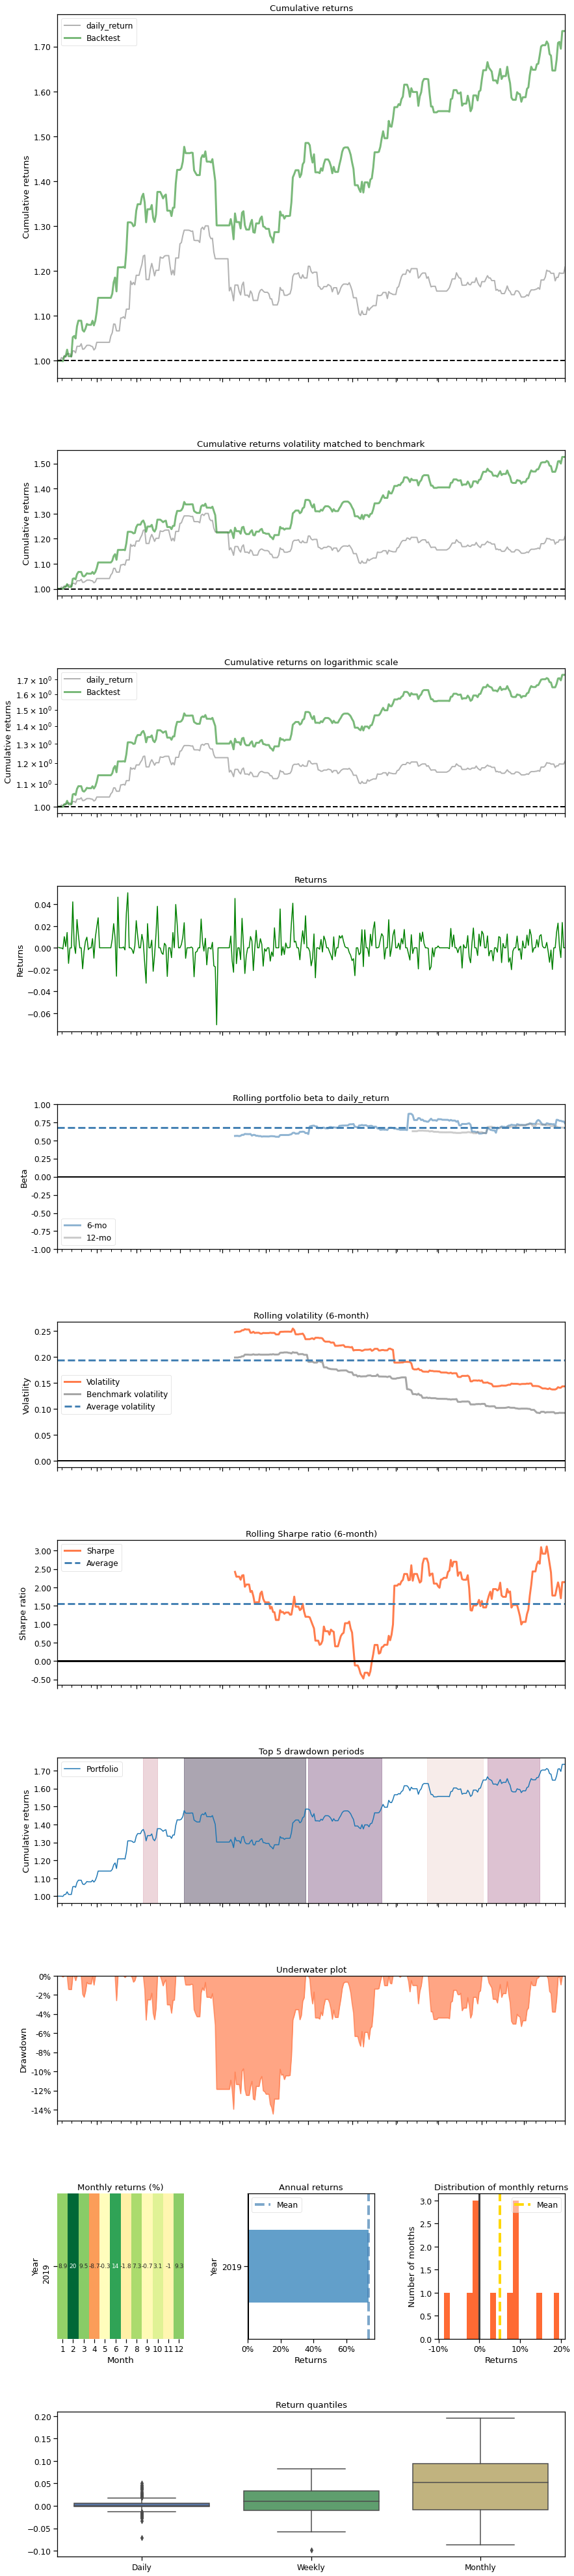

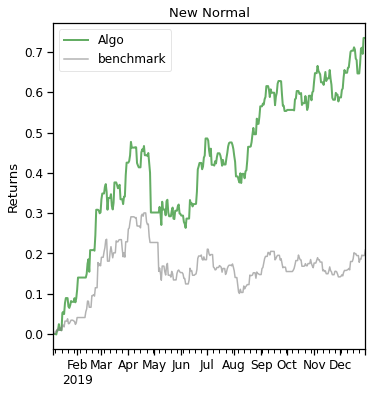

In [77]:
print("==============Compare to DJIA===========")
%matplotlib inline
# SSE 50: 000001.SS
backtest_plot(df_account_value,
             baseline_ticker = "000001.SS", 
             baseline_start = '2019-01-04',
             baseline_end = '2019-12-31')